\begin{equation}
    Y_t = \sum_{i=1}^k \alpha_{i} Y_{t-i}  + \sum_{i=1}^k \beta_{i} X_{t-i} + \epsilon_t
\end{equation}

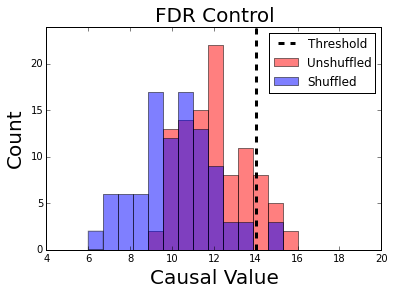

In [18]:
# Scratch work

import numpy as np

u = np.random.normal(loc=12, scale=1.5, size=100)
s = np.random.normal(loc=10, scale=2.0, size=100)
bins = np.linspace(6, 16, 15)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.hist(u, alpha=0.5, color = 'red', label="Unshuffled", bins=bins )
plt.hist(s, alpha=0.5, color = 'blue', label="Shuffled", bins=bins)
plt.xlim(4,20)
plt.ylim(0, 24)
plt.xlabel("Causal Value", fontsize=20)
plt.axvline(x = 14, label="Threshold", color='black', linestyle='dashed', linewidth=3.0)
plt.title("FDR Control", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.legend()
plt.show()

$\frac{ \text{# Shuffled }}{\text{# Shuffled + # Unshuffled}} 

#### Plot for Z -> X -> Y: Pairwise Granger Causality

In [89]:
import scipy.io as io
import numpy as np
import collections
import os

gcdir =  'granger-causality/ZactXactY_R/PGC/'
model = 'Z->X->Y'
model_orders = range(1,10)


!ls $gcdir
filelist = [gcdir + 'PGC_p_' + str(i) + "_.mat" for i in model_orders]

matrices_dict = collections.OrderedDict()

for matr_file in filelist:
    mat_dict = io.loadmat(matr_file, appendmat=False)
    matrices_dict[matr_file] = mat_dict[mat_dict.keys()[0]]
    matrices_dict[matr_file][np.where(matrices_dict[matr_file] == 0)] = 1

PGC.R                              PGC_p_6_.mat
PGC_p_1_.csv                       PGC_p_7_.csv
PGC_p_1_.mat                       PGC_p_7_.mat
PGC_p_2_.csv                       PGC_p_8_.csv
PGC_p_2_.mat                       PGC_p_8_.mat
PGC_p_3_.csv                       PGC_p_9_.csv
PGC_p_3_.mat                       PGC_p_9_.mat
PGC_p_4_.csv                       PGCrun.R
PGC_p_4_.mat                       expression_ZXYA_200000_Z->X->Y.mat
PGC_p_5_.csv                       workspace.RData
PGC_p_5_.mat                       workspace_B.RData
PGC_p_6_.csv


Max value is  5


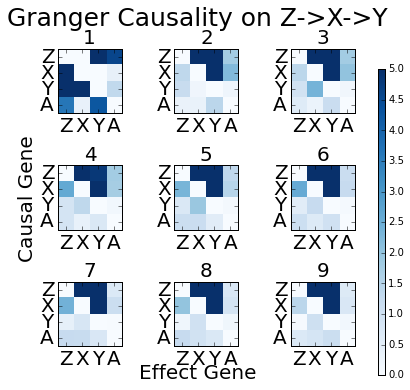

In [90]:
# display the p-values of interactions

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

classes = ['Z', 'X', 'Y', 'A']
cmap=plt.cm.Blues


max_value = 5 #np.max(-np.log10(np.array(matrices_dict.values())))
print "Max value is ", max_value
min_value = 0


fig = plt.figure(figsize=(5,5))
fig_ax = fig.add_subplot(1,1,1)

fig.text(0.5, 0.00, 'Effect Gene', ha='center', fontsize=20)
fig.text(0.00, 0.5, 'Causal Gene', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 0.98, 'Granger Causality on ' + str(model), ha='center', fontsize=25)
# plt.ylabel('Cause Gene', fontsize=15)
# plt.xlabel('Effect Gene', fontsize=15)
# plt.title("Granger Causality of " + str(model), fontsize=25)

for i in range(len(model_orders)):
    p = model_orders[i]
    matr_file = matrices_dict.keys()[i]
    
    
    title = str(p)
    
    
    # First normalize into recalls.
    cm = -np.log10(matrices_dict[matr_file])
    
    ax = plt.subplot(3,3, i+1)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap, clim=(0, max_value))
    ax.set_title(title, fontsize=20)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    
position = fig.add_axes([1, 0.01, 0.02, 0.85])
# cax, kw = mpl.colorbar.make_axes(fig_ax)

mpl.colorbar.colorbar_factory(position, im)
plt.tight_layout()
plt.show()

# Plot for Z -> X, Z -> Y, pairwise granger causality

In [86]:
import scipy.io as io
import numpy as np
import collections
import os

gcdir =  'granger-causality/ZactX-ZactY_R/PGC/'
model = 'Z->X-Z->Y'
model_orders = range(1,10)


!ls $gcdir
filelist = [gcdir + 'PGC_p_' + str(i) + "_.mat" for i in model_orders]

matrices_dict = collections.OrderedDict()

for matr_file in filelist:
    mat_dict = io.loadmat(matr_file, appendmat=False)
    matrices_dict[matr_file] = mat_dict[mat_dict.keys()[0]]
    matrices_dict[matr_file][np.where(matrices_dict[matr_file] == 0)] = 1

PGC.R                                PGC_p_6_.mat
PGC_p_1_.mat                         PGC_p_7_.mat
PGC_p_2_.mat                         PGC_p_8_.mat
PGC_p_3_.mat                         PGC_p_9_.mat
PGC_p_4_.mat                         PGCrun.R
PGC_p_5_.mat                         expression_ZXYA_200000_Z->X-Z->Y.mat


Max value is  5


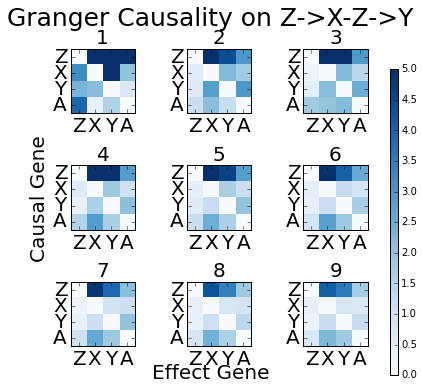

In [88]:
# display the p-values of interactions

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

classes = ['Z', 'X', 'Y', 'A']
cmap=plt.cm.Blues


max_value = 5#np.max(-np.log10(np.array(matrices_dict.values())))
print "Max value is ", max_value
min_value = 0


fig = plt.figure(figsize=(5,5))
fig_ax = fig.add_subplot(1,1,1)

fig.text(0.5, 0.00, 'Effect Gene', ha='center', fontsize=20)
fig.text(0.00, 0.5, 'Causal Gene', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 0.98, 'Granger Causality on ' + str(model), ha='center', fontsize=25)
# plt.ylabel('Cause Gene', fontsize=15)
# plt.xlabel('Effect Gene', fontsize=15)
# plt.title("Granger Causality of " + str(model), fontsize=25)

for i in range(len(model_orders)):
    p = model_orders[i]
    matr_file = matrices_dict.keys()[i]
    
    
    title = str(p)
    
    
    # First normalize into recalls.
    cm = -np.log10(matrices_dict[matr_file])
    
    ax = plt.subplot(3,3, i+1)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap, clim=(0, max_value))
    ax.set_title(title, fontsize=20)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    
position = fig.add_axes([1, 0.01, 0.02, 0.85])
# cax, kw = mpl.colorbar.make_axes(fig_ax)

mpl.colorbar.colorbar_factory(position, im)
plt.tight_layout()
plt.show()

In [22]:
#GRANGER CAUSALITY

from sklearn import linear_model
import scipy.stats as stats
import itertools

from scipy.spatial import cKDTree
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_lagged_vector(X_list, index, tau, E):
    """Generate lagged vector of X: (X[index], X[index - tau], ..., X[index - tau*E - 1]).
    
    :param X_list: list of X observations at equally spaced time intervals.
    :param index: index to start from
    :param tau: time lag
    :param E: dimension of lagged vector
    
    :return: (X[index], X[index - tau], ..., X[index - tau*E - 1])
    """
    assert index >= tau * (E - 1)
    return [X_list[index - e * tau] for e in range(E)]


def pairwise_granger_causality(i, j, p):
    """
    Computes beta of fit and p-value of fit to determine if i granger causes j.
    i and j must have length at least p (to construct lagged vectors)
    Returns: beta of i on j, pvalue
    """
    if len(i) != len(j):
        raise ValueError("i and j must have same length")
    if len(i) < p:
        raise ValueError("i and j must have at least length p")
    
    T = len(i)
    #lagged_i goes from p up to T, the length of i. It is a T-p matrix
    lagged_i = np.array([get_lagged_vector(i, index, 1, p) for index in range(p-1, T-1)])
    
    lagged_j = np.array([get_lagged_vector(j, index, 1, p) for index in range(p-1, T-1)])
    
    target = np.array(j[p:T])
    
    print "Length of vectors is ", T
    print "Model order is ", p
    print "shape of lagged vectors is ", lagged_i.shape
    print "Shapre of target is ", target.shape
    
    # Restricted classification
    clf_j = linear_model.LinearRegression()
    clf_j.fit(lagged_j, target)
    pred_j = clf_j.predict(lagged_j)
    
    SSE_j = np.sum(np.power(target - pred_j, 2))
    
    # Unrestricted classification
    clf_ij = linear_model.LinearRegression()
    lagged_ij = np.concatenate((lagged_i, lagged_j), axis=1)
    clf_ij.fit(lagged_ij, target)
    pred_ij = clf_ij.predict(lagged_ij)
    
    SSE_ij = np.sum(np.power(target - pred_ij, 2))

    
    # Formula is taken from: http://pages.uoregon.edu/aarong/teaching/G4075_Outline/node4.html
    # The variance explained by i itself compared to variance of just j
    # IF i explains more variance then we reject
    #DOF of first is p = 2p - p = # in ij fit - # in j fit (# of params added)
    # DOF of bottom is is n - p - 1 (where p is the number of parameters in the bottom model)
    F = ((SSE_j - SSE_ij) * 1.0 / p)/(SSE_ij/(len(target) - 2 * p - 1))

    p_value = 1.0 - stats.f.cdf(F, p, len(target) - 2 * p - 1)
    
    return p_value

def pairwise_granger_causality_all(matr, p):
    """
    Assume matr is an n by T matrix, where n is number of genes, T is # timepoints.
    """
    n, T = np.array(matr).shape
    
    new_matr = np.zeros(shape=(n,n))
    
    pairs = itertools.permutations(range(n), 2)
    
    for pair in pairs:
        i, j = pair
        new_matr[i][j] = pairwise_granger_causality(matr[i], matr[j], p)
        
    return new_matr

In [23]:
from scipy import io


outfilepref = "granger-causality/ZactXactY_R/PGC/python_PGC"
data = io.loadmat(file_name="granger-causality/ZactXactY_R/PGC/expression_ZXYA_200000_Z->X->Y.mat")["expression"]
print data.shape


for p in range(1, 10):
    B = pairwise_granger_causality_all(data, p)
    
    filename = outfilepref + "_p_" + str(p) + "_.mat"
    
    io.savemat(filename, {"B_python": B})

(4, 111)
Length of vectors is  111
Model order is  1
shape of lagged vectors is  (110, 1)
Shapre of target is  (110,)
Length of vectors is  111
Model order is  1
shape of lagged vectors is  (110, 1)
Shapre of target is  (110,)
Length of vectors is  111
Model order is  1
shape of lagged vectors is  (110, 1)
Shapre of target is  (110,)
Length of vectors is  111
Model order is  1
shape of lagged vectors is  (110, 1)
Shapre of target is  (110,)
Length of vectors is  111
Model order is  1
shape of lagged vectors is  (110, 1)
Shapre of target is  (110,)
Length of vectors is  111
Model order is  1
shape of lagged vectors is  (110, 1)
Shapre of target is  (110,)
Length of vectors is  111
Model order is  1
shape of lagged vectors is  (110, 1)
Shapre of target is  (110,)
Length of vectors is  111
Model order is  1
shape of lagged vectors is  (110, 1)
Shapre of target is  (110,)
Length of vectors is  111
Model order is  1
shape of lagged vectors is  (110, 1)
Shapre of target is  (110,)
Length of 

# Test new granger causality

In [4]:
import geneTSmunging as gtm

data_file = "../data/GeneExpressionData/small_TPM.txt"
out_file = "../data/GeneExpressionData/small_TPM-randomized.txt"

data = gtm.load_file_and_avg(data_file)

rand_data = gtm.make_and_save_randomized_data(data, out_file)

print data[gtm.timekeys].head()
print rand_data[gtm.timekeys].head()

Avg + STD loaded
Randomized written to  ../data/GeneExpressionData/small_TPM-randomized.txt
        t00       t05       t1_       t2_       t3_       t4_       t5_  \
0  0.000466 -0.000710  0.001036  0.002446 -0.000593  0.000287 -0.001110   
1  0.001944  0.001253 -0.000280  0.000704 -0.002513 -0.001732 -0.006850   
2  0.004336  0.010700  0.008688 -0.002444  0.001091 -0.000022  0.001504   
3  0.154250  0.103241  0.132005  0.167655  0.210110  0.148455  0.121075   
4  0.107607  0.148978  0.081421  0.006955  0.029222  0.039379  0.083964   

        t6_       t7_       t8_       t10       t12  
0  0.047217 -0.000168 -0.000043  0.000595 -0.000913  
1 -0.007547  0.001417  0.036537  0.003223  0.002965  
2  0.000854  0.000513  0.011895 -0.001113  0.011748  
3  0.168695  0.134241  0.111858  0.054600  0.195073  
4  0.032541  0.095341  0.066656  0.013493  0.023869  
        t00       t05       t1_       t2_       t3_       t4_       t5_  \
0 -0.000710 -0.000168  0.000287  0.000466  0.001036  0.000

In [5]:
print len(data)

99


In [8]:
import prep_jobs as pj
partition_pair = ((0,0), (98, 98))

pairlist = pj.partition_pair_to_pairlist(partition_pair, 99)

In [9]:
pairlist

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (1, 0),
 (1, 1),
 (

In [10]:
import CausalTests as ct

found_genes, matr1 = gtm.get_gene_TS(data, data["gene"])
print "Genes 1", len(found_genes), matr1.shape

found_genes, matr2 = gtm.get_gene_TS(rand_data, rand_data["gene"])
print "Genes 2", len(found_genes), matr2.shape

Genes 1 99 (99, 12)
Genes 2 99 (99, 12)


In [23]:
p, b = ct.pairwise_granger_causality_matr_pair(matr2, matr1, pairs=pairlist)

In [25]:
p = p.reshape((99, 99))

In [33]:
b = b.reshape((99, 99, 2))

In [26]:
p

array([[ 0.17231376,  0.02157578,  0.509251  , ...,  0.65101316,
         0.55550772,  0.65147373],
       [ 0.70524473,  0.90474361,  0.74811258, ...,  0.23967372,
         0.76297546,  0.04013138],
       [ 0.44836963,  0.58177713,  0.28416194, ...,  0.75931638,
         0.91045006,  0.99259665],
       ..., 
       [ 0.77832266,  0.9000753 ,  0.22030063, ...,  0.57236977,
         0.34754995,  0.55980432],
       [ 0.01062975,  0.94461404,  0.76677795, ...,  0.33633661,
         0.10059922,  0.69913143],
       [ 0.8582898 ,  0.5677802 ,  0.67071525, ...,  0.96745131,
         0.06708298,  0.92990995]])

In [28]:
import pickle

In [30]:
test_p, test_b = pickle.load(open("della/small_TPM-test-pair/small_TPM-test-pair.p", 'rB'))
test_p

array([[ 0.17231376,  0.02157578,  0.509251  , ...,  0.65101316,
         0.55550772,  0.65147373],
       [ 0.70524473,  0.90474361,  0.74811258, ...,  0.23967372,
         0.76297546,  0.04013138],
       [ 0.44836963,  0.58177713,  0.28416194, ...,  0.75931638,
         0.91045006,  0.99259665],
       ..., 
       [ 0.77832266,  0.9000753 ,  0.22030063, ...,  0.57236977,
         0.34754995,  0.55980432],
       [ 0.01062975,  0.94461404,  0.76677795, ...,  0.33633661,
         0.10059922,  0.69913143],
       [ 0.8582898 ,  0.5677802 ,  0.67071525, ...,  0.96745131,
         0.06708298,  0.92990995]])

In [35]:
np.max(np.absolute(p - test_p))

8.7587270769518e-11

In [36]:
np.max(np.absolute(b - test_b))

3.4827651873570176e-10

In [17]:
norm_p, norm_b = ct.pairwise_granger_causality_matr_pair(matr1, matr1, pairs=pairlist)

In [18]:
norm_p = norm_p.reshape((99, 99))
norm_b = norm_b.reshape((99, 99, 2))

In [19]:
norm_p

array([[  1.00000000e+00,   1.23105640e-04,   2.80954308e-01, ...,
          4.44145587e-01,   7.03103043e-01,   3.54487545e-01],
       [  6.59124213e-01,   1.00000000e+00,   6.38674909e-01, ...,
          7.77615718e-01,   4.64635296e-02,   4.98062905e-01],
       [  7.09631185e-01,   8.81190719e-01,   1.00000000e+00, ...,
          4.70088539e-01,   4.44184696e-01,   4.98996616e-01],
       ..., 
       [  4.90948141e-01,   3.41208433e-01,   7.45665541e-01, ...,
          1.00000000e+00,   1.99702334e-01,   1.61426502e-01],
       [  7.18271966e-01,   1.11370851e-01,   8.19603777e-01, ...,
          5.78737713e-01,   1.00000000e+00,   1.30014878e-01],
       [  2.64311421e-01,   5.80215336e-01,   8.13349434e-01, ...,
          4.64779226e-01,   1.33502706e-02,   1.00000000e+00]])

In [21]:
rows = [1,2,3,4]

In [20]:
import pandas as pd
res_df = pd.DataFrame(data={"A": [1,4,-1, 10], "error.min": [5,7,6, 20]})

In [23]:
header = res_df.columns.values
all_res_index = range(len(res_df) * len(rows))
all_res_df = pd.DataFrame(index=all_res_index, columns=header)

use_index = range(len(rows))
use_df = pd.DataFrame(index=use_index, columns=header)

In [24]:
for i, row in zip(range(len(rows)), rows):
    res_df["error.min"] = i * np.arange(len(rows))
    index = i
    all_res_df.iloc[len(res_df) * i : len(res_df) * (i + 1)] = res_df.as_matrix()
    use_df.iloc[i] = res_df.iloc[index]

In [26]:
use_df

,A,error.min
0,1,0
1,4,1
2,-1,4
3,10,9


In [25]:
all_res_df

,A,error.min
0,1,0
1,4,0
2,-1,0
3,10,0
4,1,0
5,4,1
6,-1,2
7,10,3
8,1,0
9,4,2


In [13]:
np.where(b_df["B"] <= min(b_df["B"]))[0][0]

1

In [9]:
b_df.index = range(len(b_df))
b_df

,A,B
0,-1,6
1,1,5
2,4,7


In [19]:
b_df.iloc[1].values

array([1, 5])

In [30]:
T = 12
lag = 2
n = 30
X = np.zeros((T, n))

for i in range(T):
    X[i] = np.arange(n) * i
print X

y = np.arange(T) * -1 
print y

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
    12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
    24.   25.   26.   27.   28.   29.]
 [   0.    2.    4.    6.    8.   10.   12.   14.   16.   18.   20.   22.
    24.   26.   28.   30.   32.   34.   36.   38.   40.   42.   44.   46.
    48.   50.   52.   54.   56.   58.]
 [   0.    3.    6.    9.   12.   15.   18.   21.   24.   27.   30.   33.
    36.   39.   42.   45.   48.   51.   54.   57.   60.   63.   66.   69.
    72.   75.   78.   81.   84.   87.]
 [   0.    4.    8.   12.   16.   20.   24.   28.   32.   36.   40.   44.
    48.   52.   56.   60.   64.   68.   72.   76.   80.   84.   88.   92.
    96.  100.  104.  108.  112.  116.]
 [   0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   5

In [31]:
X_t = np.zeros((T - lag, n * lag))

for j in range(T - lag):
    for k in range(lag):
        X_t[j, n*k:n*(k+1)] = X[j + lag - k, ]

y_t = y[(lag+1):T]

In [42]:
from sklearn.cross_validation import StratifiedKFold

In [47]:
labels = [i /4 for i in range(12)]
print labels
cv = StratifiedKFold(labels, 4)
for train_index, test_index in cv:
    print train_index, test_index

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
[ 1  2  3  5  6  7  9 10 11] [0 4 8]
[ 0  2  3  4  6  7  8 10 11] [1 5 9]
[ 0  1  3  4  5  7  8  9 11] [ 2  6 10]
[ 0  1  2  4  5  6  8  9 10] [ 3  7 11]


In [77]:
get_min_k(d, 5)

([4, 3, 5, 0, 6], array([1, 2, 3, 3, 5]))

In [4]:
import CausalTests as ct
import numpy as np

In [5]:
n_samples, n_features = 60, 100

np.random.seed(1)
X = np.random.randn(n_samples, n_features)
coef = 3*np.random.randn(n_features)
coef[10:] = 0 # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal((n_samples,))

# Split data in train set and test se

In [21]:
n = n_features
T = n_samples
lag = 2

X_t = np.zeros((T - lag, n * lag))

for j in range(T - lag):
    for k in range(lag):
        X_t[j, n*k:n*(k+1)] = X[j + lag - k, ]

y_t = y[lag:]

In [29]:
top_num = 3
n_folds = 3
max_iter = 100
print alphas

cv = ct.get_TS_cv(len(y_t), n_folds)

[ 0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12
  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23  0.24
  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35  0.36
  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48
  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  0.6
  0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71  0.72
  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83  0.84
  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95  0.96
  0.97  0.98  0.99]


In [54]:
from sklearn.linear_model import LinearRegression, ElasticNetCV
import pandas as pd

In [81]:
reload(ct)

<module 'CausalTests' from 'CausalTests.py'>

In [88]:
cv = ct.get_TS_cv(len(y_t), n_folds)

print "For # alphas: ", len(alphas)
%time top_df = ct.enet_granger_causality_cv(X_t, y_t, cv, alphas=alphas)

For # alphas:  300
CPU times: user 17.1 s, sys: 104 ms, total: 17.2 s
Wall time: 17.7 s


In [78]:
print top_df.shape
top_df.head()

(396, 3)


,alpha,error.min,lambda.min
0,0.99,22.534364,0.007259
1,0.99,22.549312,0.007784
2,0.99,22.566005,0.008347
3,0.99,22.582873,0.008950
4,0.99,22.600528,0.009596


In [91]:
y_pred = y_t + 1
np.average((y_t - y_pred)**2)

1.0

In [36]:
mses = enet.mse_path_

In [57]:
top_num = 100

In [60]:
# this will keep the smallest
top_indices, top_mses = ct.get_min_k(cv_mses, top_num)

top_lambdas = cv_lambdas[top_indices]
top_alphas = cv_alphas[top_indices]

top_df = pd.DataFrame(data={"lambda.min": top_lambdas, "alpha": top_alphas, "error.min": top_mses})

In [62]:
np.average([5,4,5])

4.666666666666667

In [69]:
X_t.shape

(58, 200)

In [68]:
enet.coef_.shape

(200,)

In [71]:
from sklearn.linear_model import ElasticNet

test_errs = np.zeros(len(top_df))
scores = np.zeros(len(top_df))
dfs = np.zeros(len(top_df))

test_coefs = np.zeros((len(top_df), X_t.shape[1]))
for i in range(len(top_df)):
    alpha = top_df.iloc[i]["alpha"]
    lambda_min = top_df.iloc[i]["lambda.min"]
    enet = ElasticNet(l1_ratio=alpha, alpha=lambda_min)
    enet.fit(X_t, y_t)
    y_pred = enet.predict(X_t)
    test_errs[i] = np.average((y_t - y_pred)**2)
    scores[i] = enet.score(X_t, y_t)
    test_coefs[i] = enet.coef_
    
    dfs[i] = len(np.where(enet.coef_)[0])
    
top_df["test_err"] = test_errs
top_df["score"] = scores
top_df["df"] = dfs

print top_df

    alpha  error.min  lambda.min  test_err     score    df
0    0.99  22.534364    0.007259  0.000711  0.999993  17.0
1    0.99  22.549312    0.007784  0.000818  0.999992  17.0
2    0.99  22.566005    0.008347  0.000920  0.999991  17.0
3    0.99  22.582873    0.008950  0.001078  0.999990  17.0
4    0.99  22.600528    0.009596  0.001207  0.999989  17.0
5    0.99  22.617994    0.010290  0.001391  0.999987  17.0
6    0.99  22.634447    0.011034  0.001587  0.999985  17.0
7    0.99  22.650516    0.011831  0.001839  0.999983  17.0
8    0.99  22.667412    0.012686  0.002110  0.999980  17.0
9    0.99  22.692117    0.013603  0.002426  0.999977  17.0
10   0.99  22.710110    0.014586  0.002767  0.999974  17.0
11   0.99  22.735867    0.015640  0.003193  0.999970  17.0
12   0.99  22.753928    0.016770  0.003657  0.999966  17.0
13   0.99  22.770854    0.017982  0.004197  0.999961  17.0
14   0.99  22.787013    0.019282  0.004856  0.999955  17.0
15   0.99  22.802714    0.020675  0.005579  0.999948  17

In [93]:
reload(ct)

<module 'CausalTests' from 'CausalTests.py'>

In [94]:
top_df, test_coefs = ct.enet_granger_causality_test(X_t, y_t, top_df)

In [95]:
test_coefs.shape

(1200, 200)

In [96]:
len(top_df)

1200

In [98]:
top_df.describe()

,alpha,error.min,lambda.min,test_err,score,df
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.959887,30.555324,0.114722,0.403671,0.996236,22.792500
std,0.018756,5.757457,0.127802,0.741618,0.006916,5.047839
min,0.927726,22.534364,0.007259,0.000711,0.961815,14.000000
25%,0.944114,25.278864,0.020650,0.006540,0.996186,18.000000
50%,0.960502,29.768741,0.058742,0.051678,0.999518,23.000000
75%,0.976890,35.522659,0.167840,0.408972,0.999939,28.000000
max,0.990000,41.564513,0.592755,4.094693,0.999993,33.000000


In [101]:
top_df.sort("test_err")

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,alpha,error.min,lambda.min,test_err,score,df
0,0.990000,22.534364,0.007259,0.000711,0.999993,17.0
11,0.986722,22.725284,0.007283,0.000734,0.999993,19.0
28,0.983445,22.854051,0.007308,0.000755,0.999993,20.0
54,0.980167,22.984007,0.007332,0.000775,0.999993,20.0
116,0.976890,23.420661,0.007357,0.000800,0.999993,20.0
176,0.973612,24.029752,0.007382,0.000808,0.999992,21.0
1,0.990000,22.549312,0.007784,0.000818,0.999992,17.0
227,0.970334,24.622360,0.007406,0.000833,0.999992,22.0
13,0.986722,22.738633,0.007810,0.000842,0.999992,19.0
262,0.967057,24.986905,0.007432,0.000859,0.999992,23.0


In [102]:
import geneTSmunging as gtm

# Small data, 100 genes

In [106]:
data = gtm.load_file_and_avg("Enet/small_TPM-avg.txt")

found_genes, geneTS = gtm.get_gene_TS(data, data["gene"])

print geneTS.shape
print geneTS

Avg + STD loaded
(100, 12)
[[ 0.49484238  0.53714282  0.62506496 ...,  0.52527729  0.53656133
   0.35290245]
 [ 0.95042984  0.85225909  0.77666868 ...,  1.00415122  0.77036824
   0.98011805]
 [ 3.54428738  3.55911824  3.10624164 ...,  3.31815621  3.15048125
   3.14930872]
 ..., 
 [ 1.98618627  1.9497701   1.81032042 ...,  1.67106721  1.6633224
   1.56155976]
 [ 5.89298407  5.85591087  5.88054204 ...,  5.92054549  5.94998633
   5.97521896]
 [ 1.51217844  1.45703843  1.51720832 ...,  1.44695417  1.38895757
   1.51810804]]


In [119]:
rows = [0, 1, 2]
min_alpha = 0.01
max_alpha = 0.99
num_alphas = 100
alphas = np.linspace(min_alpha, max_alpha, num_alphas)
print alphas

[ 0.01        0.01245614  0.01491228  0.01736842  0.01982456  0.0222807
  0.02473684  0.02719298  0.02964912  0.03210526  0.0345614   0.03701754
  0.03947368  0.04192982  0.04438596  0.04684211  0.04929825  0.05175439
  0.05421053  0.05666667  0.05912281  0.06157895  0.06403509  0.06649123
  0.06894737  0.07140351  0.07385965  0.07631579  0.07877193  0.08122807
  0.08368421  0.08614035  0.08859649  0.09105263  0.09350877  0.09596491
  0.09842105  0.10087719  0.10333333  0.10578947  0.10824561  0.11070175
  0.11315789  0.11561404  0.11807018  0.12052632  0.12298246  0.1254386
  0.12789474  0.13035088  0.13280702  0.13526316  0.1377193   0.14017544
  0.14263158  0.14508772  0.14754386  0.15        0.15245614  0.15491228
  0.15736842  0.15982456  0.1622807   0.16473684  0.16719298  0.16964912
  0.17210526  0.1745614   0.17701754  0.17947368  0.18192982  0.18438596
  0.18684211  0.18929825  0.19175439  0.19421053  0.19666667  0.19912281
  0.20157895  0.20403509  0.20649123  0.20894737  0.2

In [122]:
%time betas, all_res_df, use_df = ct.enet_granger_causality_row(geneTS, geneTS, rows, alphas )

CV is  sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 1 1 1 2 2 2 3], n_folds=3, shuffle=False, random_state=None)


CausalTests.py:356: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  topk_indices = sorted(np.argpartition(a, k)[:k], key = lambda entry: a[entry])


CV is  sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 1 1 1 2 2 2 3], n_folds=3, shuffle=False, random_state=None)


CausalTests.py:258: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if header == None:


CV is  sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 1 1 1 2 2 2 3], n_folds=3, shuffle=False, random_state=None)
CPU times: user 1min 13s, sys: 502 ms, total: 1min 14s
Wall time: 1min 15s


# All data, 3000 genes

In [123]:
data = gtm.load_file_and_avg("../data/GeneExpressionData/edgeR-reg-avg/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.protein_coding-edgeR-reg-avg.txt")

found_genes, geneTS = gtm.get_gene_TS(data, data["gene"])

print geneTS.shape
print geneTS

Avg + STD loaded
(3545, 12)
[[ 1.47040223  1.4982487   1.47821205 ...,  1.53996098  1.29676846
   1.44062158]
 [ 1.76348224  1.81127374  1.82762428 ...,  1.99445511  1.99816954
   1.94426186]
 [ 4.10832635  4.1072434   4.27356973 ...,  4.29147524  4.35970052
   4.35678656]
 ..., 
 [ 1.58209541  1.64840443  1.79267322 ...,  1.88709416  1.86847499
   1.87976474]
 [ 9.7814493   9.60533985  9.76557269 ...,  9.95068726  9.85221996
   9.87138881]
 [ 9.15629864  8.9766435   9.25240276 ...,  9.45575629  9.38915071
   9.37575346]]


In [133]:
rows = [0]
min_alpha = 0.01
max_alpha = 0.99
num_alphas = 20
alphas = np.linspace(min_alpha, max_alpha, num_alphas)
print alphas

[ 0.01        0.06157895  0.11315789  0.16473684  0.21631579  0.26789474
  0.31947368  0.37105263  0.42263158  0.47421053  0.52578947  0.57736842
  0.62894737  0.68052632  0.73210526  0.78368421  0.83526316  0.88684211
  0.93842105  0.99      ]


In [172]:
reload(ct)

<module 'CausalTests' from 'CausalTests.py'>

In [173]:
%time beta_tuple, all_res_df, use_df = ct.enet_granger_causality_row(geneTS, geneTS, rows, alphas )

CV is  sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 1 1 1 2 2 2 3], n_folds=3, shuffle=False, random_state=None)


CausalTests.py:364: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  def get_CCM(X_list, Y_list, L, tau=1, E=3, test_indices=None, num_test=100, use_same=True):


Shape of beta tuple is  (1, 3545, 2)
CPU times: user 40.7 s, sys: 377 ms, total: 41 s
Wall time: 41.4 s


CausalTests.py:270: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


In [128]:
betas.shape

(1, 7090)

In [131]:
all_res_df.sort("test_err").describe()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,alpha,error.min,lambda.min,test_err,score,df,Row
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,0.430776,0.048229,0.076822,0.005810,0.647708,27.414000,0.0
std,0.313014,0.001502,0.129277,0.001702,0.103213,63.237327,0.0
min,0.010000,0.040562,0.011350,0.000033,0.461370,2.000000,0.0
25%,0.108990,0.048159,0.020110,0.005338,0.579004,3.000000,0.0
50%,0.435657,0.048655,0.031812,0.006075,0.631622,5.000000,0.0
75%,0.695505,0.049035,0.076082,0.006943,0.676351,15.000000,0.0
max,0.990000,0.049563,1.291974,0.008883,0.997972,388.000000,0.0


In [132]:
use_dfs = []
use_dfs.append(use_df)

In [135]:
use_dfs.append(use_df)

In [136]:
use_dfs

[  alpha  error.min lambda.min     test_err     score   df Row
 0  0.01  0.0494822  0.0242092  3.34374e-05  0.997972  388   0,
   alpha  error.min lambda.min     test_err     score   df Row
 0  0.01  0.0492037  0.0298463  5.03723e-05  0.996946  369   0]

In [146]:
row = 3
y = geneTS[row].T
X = np.concatenate((geneTS[:row], [geneTS[row]], geneTS[row+1:])).T

In [150]:
lag = 2
n, T = np.array(geneTS).shape

X_t = np.zeros((T - lag, n * lag))

for j in range(T - lag):
    for k in range(lag):
        X_t[j, n*k:n*(k+1)] = X[j + lag - k - 1, ]

# Y is a vector of T -lag rows where for row j, the value of j is i = j + lag
y_t = y[lag:T]

In [153]:
print y
print y_t

[ 0.77824874  0.80234869  0.79111867  0.69111471  0.7691065   0.77267344
  0.51252858  0.61420831  0.75277127  0.82126244  0.77585586  0.78346855]
[ 0.79111867  0.69111471  0.7691065   0.77267344  0.51252858  0.61420831
  0.75277127  0.82126244  0.77585586  0.78346855]


In [154]:
print X_t.shape

(10, 7090)


In [157]:
print X_t[:, 0:2]
print X_t[:, 3545: 3547]

[[ 1.4982487   1.81127374]
 [ 1.47821205  1.82762428]
 [ 1.40595194  1.8507007 ]
 [ 1.14554714  1.79869023]
 [ 1.36724846  1.76622767]
 [ 1.12762626  1.70286016]
 [ 1.29195305  1.9233287 ]
 [ 1.40745521  1.87613439]
 [ 1.53996098  1.99445511]
 [ 1.29676846  1.99816954]]
[[ 1.47040223  1.76348224]
 [ 1.4982487   1.81127374]
 [ 1.47821205  1.82762428]
 [ 1.40595194  1.8507007 ]
 [ 1.14554714  1.79869023]
 [ 1.36724846  1.76622767]
 [ 1.12762626  1.70286016]
 [ 1.29195305  1.9233287 ]
 [ 1.40745521  1.87613439]
 [ 1.53996098  1.99445511]]


In [177]:
import pickle
betas = pickle.load(open("small_TPM-avg-betas.p",'rU'))
print betas.shape

(5, 100, 2)


In [184]:
alphas = [0.5]
lambda_mins = [0.01]
df = pd.DataFrame({"alpha": alphas, "lambda.min": lambda_mins})

# Confirming elastic net scrip

In [8]:
df = gtm.load_file_and_avg("small_TPM-avg.txt")
genes = df['gene'].values

found_genes, geneTS = gtm.get_gene_TS(df, genes)

geneTS.shape

matr1 = geneTS
matr2 = geneTS
model_order = 2
n, T = np.array(matr1).shape
lag = model_order
row = 0

y = matr2[row].T

X = np.concatenate((matr1[:row], [matr2[row]], matr1[row+1:])).T

X_t = np.zeros((T - lag, n * lag))

for j in range(T - lag):
    for k in range(lag):
        X_t[j, n*k:n*(k+1)] = X[j + lag - k - 1, ]

# Y is a vector of T -lag rows where for row j, the value of j is i = j + lag
y_t = y[lag:T]

Avg + STD loaded


In [10]:
import pandas as pd
import geneTSmunging as gtm
import numpy as np
import pickle
from sklearn.linear_model import ElasticNet

In [29]:
test_coef = pickle.load(open("small_TPM-avg-betas.p", 'rU'))

In [30]:
print test_coef.shape

(5, 100, 2)


In [31]:
print test_coef[0][0:10]

[[-0.          0.        ]
 [ 0.08798916 -0.        ]
 [ 0.01260309 -0.        ]
 [-0.         -0.        ]
 [ 0.         -0.        ]
 [-0.         -0.        ]
 [ 0.          0.        ]
 [ 0.         -0.        ]
 [ 0.5569271  -0.08937858]
 [ 0.         -0.        ]]


In [25]:
all_res = pd.read_csv("small_TPM-avg-all.df", sep="\t")
all_res.head()

,alpha,error.min,lambda.min,test_err,score,df,Row
0,0.5,0.050032,0.0001,0.000002,0.999837,16.0,0.0
1,0.6,0.049103,0.0001,0.000003,0.999789,13.0,0.0
2,0.6,0.050583,0.0002,0.000011,0.999160,12.0,0.0
3,0.5,0.034819,0.0001,0.000002,0.999824,16.0,1.0
4,0.6,0.035037,0.0001,0.000002,0.999767,11.0,1.0


In [49]:
enet = ElasticNet(l1_ratio=0.5, alpha=0.0001, fit_intercept=True, normalize=False, tol=0.0000001, max_iter = 100000)
enet.fit(X_t, y_t)

y_pred =enet.predict(X_t)
test_err = np.average((y_t - y_pred)**2)
score = enet.score(X_t, y_t)
test_coef = enet.coef_
print "Test err: ", test_err

Test err:  2.18589326755e-06


In [33]:
print np.where(enet.coef_)

print np.dstack(tuple(np.split(np.array([enet.coef_]), lag, axis=1)))

(array([  1,   2,   8,  17,  71,  84,  85,  86,  99, 108, 117, 125, 166,
       173, 188, 193]),)
[[[-0.          0.        ]
  [ 0.08923267 -0.        ]
  [ 0.00709274 -0.        ]
  [-0.         -0.        ]
  [ 0.         -0.        ]
  [-0.         -0.        ]
  [ 0.          0.        ]
  [ 0.         -0.        ]
  [ 0.55916556 -0.09027642]
  [ 0.         -0.        ]
  [ 0.         -0.        ]
  [ 0.         -0.        ]
  [-0.          0.        ]
  [ 0.          0.        ]
  [ 0.         -0.        ]
  [-0.         -0.        ]
  [ 0.         -0.        ]
  [-0.30767606  0.03783378]
  [-0.          0.        ]
  [-0.         -0.        ]
  [-0.         -0.        ]
  [ 0.         -0.        ]
  [ 0.         -0.        ]
  [ 0.         -0.        ]
  [-0.          0.        ]
  [ 0.         -0.01720717]
  [ 0.          0.        ]
  [-0.          0.        ]
  [-0.         -0.        ]
  [ 0.         -0.        ]
  [ 0.          0.        ]
  [ 0.         -0.        ]
  [ 0.

In [213]:
len(y_t)

10

# Confirm cross-validation for enet

In [101]:
import CausalTests as ct
lags = [1,2,3]
for lag in lags:
    print "For lag:" , lag
    for i in ct.get_TS_cv(12-lag, 3):
        print i

For lag: 1
(array([ 1,  2,  4,  5,  7,  8, 10]), array([0, 3, 6, 9]))
(array([0, 2, 3, 5, 6, 8, 9]), array([ 1,  4,  7, 10]))
(array([ 0,  1,  3,  4,  6,  7,  9, 10]), array([2, 5, 8]))
For lag: 2
(array([1, 2, 4, 5, 7, 8]), array([0, 3, 6, 9]))
(array([0, 2, 3, 5, 6, 8, 9]), array([1, 4, 7]))
(array([0, 1, 3, 4, 6, 7, 9]), array([2, 5, 8]))
For lag: 3
(array([1, 2, 4, 5, 7, 8]), array([0, 3, 6]))
(array([0, 2, 3, 5, 6, 8]), array([1, 4, 7]))
(array([0, 1, 3, 4, 6, 7]), array([2, 5, 8]))


# Confirm using same params method

In [59]:
import pandas as pd
import geneTSmunging as gtm
import numpy as np
import pickle
import CausalTests as ct

In [60]:
df = gtm.load_file_and_avg("../data/GeneExpressionData/small_TPM-avg.txt")
dfr = gtm.load_file_and_avg("../data/GeneExpressionData/small_TPM-randomized-avg.txt")
genes = df['gene'].values

found_genes, geneTS = gtm.get_gene_TS(df, genes)

found_genesr, geneTSr = gtm.get_gene_TS(dfr, dfr["gene"].values)

matr1 = geneTS
matr2 = geneTSr
model_order = 2
n, T = np.array(matr1).shape
lag = model_order
rowlist = [0, 4]

args_dict = ct.load_kwargs_file(argsfile="enet_args-2.txt")

Avg + STD loaded
Avg + STD loaded


In [61]:
beta_tuple, all_res_df, use_df = ct.enet_granger_causality_row_cv(geneTS, geneTS, rowlist, **args_dict)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:417: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


CV is  sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 1 1 1 2 2 2 3], n_folds=3, shuffle=False, random_state=None)
Num cv alphas:  2000
Top num  1000
CV is  sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 1 1 1 2 2 2 3], n_folds=3, shuffle=False, random_state=None)
Num cv alphas:  2000
Top num  1000
Shape of beta tuple is  (2, 100, 2)


In [62]:
use_df.head()

,alpha,error.min,lambda.min,test_err,score,df,Row
0,0.521579,0.054176,2.70023e-05,1.6977e-07,0.999987,15,0
1,0.99,0.0216294,1.08481e-05,4.14845e-08,0.999995,11,4


In [63]:
param_df = use_df[["alpha", "lambda.min", "Row"]]

In [64]:
rand_beta_tuple, rand_all_res_df, rand_use_df = ct.enet_granger_causality_row_load(geneTSr, geneTS, rowlist, param_df,**args_dict )

print rand_all_res_df.head()
print rand_use_df.head()

Shape of beta tuple is  (2, 100, 2)
      alpha   lambda.min Row     test_err     score  df
0  0.521579  2.70023e-05   0  4.30082e-08  0.999997  11
1      0.99  1.08481e-05   4   2.5596e-08  0.999997  11
      alpha   lambda.min Row     test_err     score  df
0  0.521579  2.70023e-05   0  4.30082e-08  0.999997  11
1      0.99  1.08481e-05   4   2.5596e-08  0.999997  11


### compare to script

In [33]:
all_res_dft = pd.read_csv("Enet/test-small-TPM-enet-all-params.txt", sep="\t")
use_dft = pd.read_csv("Enet/test-small-TPM-enet-use-params.txt", sep="\t")
rand_all_res_dft = pd.read_csv("Enet/test-small-TPM-enet-all-params-randomized.txt", sep="\t")
rand_use_dft = pd.read_csv("Enet/test-small-TPM-enet-use-params-randomized.txt", sep="\t")

In [35]:
orig = [all_res_df, use_df, rand_all_res_df, rand_use_df]
test = [all_res_dft, use_dft, rand_all_res_dft, rand_use_dft]

comps = zip(orig, test)

for dfo, dft in comps:
    dfot = dft[dft["Row"].isin({0,4})]
    dfo.sort_values(["alpha", "lambda.min"], inplace=True)
    dfot.sort_values(["alpha", "lambda.min"], inplace=True)
    print dfo.shape, dft.shape, dfot.shape
    print dfo.head()
    print dfot.head()

(2000, 7) (100000, 7) (2000, 7)
     alpha  error.min   lambda.min     test_err     score  df Row
1032   0.1  0.0368158  0.000102578  1.20316e-06   0.99988  37   4
1038   0.1  0.0368136  0.000109991  1.38157e-06  0.999862  37   4
1044   0.1  0.0368129  0.000117939  1.58629e-06  0.999841  37   4
1050   0.1  0.0368105  0.000126463  1.82122e-06  0.999818  37   4
1056   0.1  0.0368089  0.000135602  2.09075e-06  0.999791  37   4
      alpha  error.min  lambda.min  test_err     score    df  Row
4032    0.1   0.036816    0.000103  0.000001  0.999880  37.0  4.0
4038    0.1   0.036814    0.000110  0.000001  0.999862  37.0  4.0
4044    0.1   0.036813    0.000118  0.000002  0.999841  37.0  4.0
4050    0.1   0.036810    0.000126  0.000002  0.999818  37.0  4.0
4056    0.1   0.036809    0.000136  0.000002  0.999791  37.0  4.0
(2, 7) (100, 7) (2, 7)
      alpha  error.min   lambda.min     test_err     score  df Row
1  0.334211  0.0454934  3.06926e-05   3.5283e-07  0.999965  20   4
0  0.334211   0.042

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### the same params were used, confirmed

In [65]:
beta_tuplet = pickle.load(open("Enet/test-small-TPM-enet.p", 'rB'))
rand_beta_tuplet = pickle.load(open("Enet/test-small-TPM-enet-randomized.p", 'rB'))

In [66]:
beta_tuplet.shape

(100, 100, 2)

In [67]:
beta_tuple.shape

(2, 100, 2)

In [68]:
print beta_tuplet[0] == beta_tuple[0]
print beta_tuplet[4] == beta_tuple[1]

[[ True  True]
 [False  True]
 [False  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [False False]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [False False]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True False]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True Fa

In [69]:
rand_beta_tuple.shape

(2, 100, 2)

In [70]:
rand_beta_tuplet.shape

(100, 100, 2)

In [71]:
print rand_beta_tuplet[0] - rand_beta_tuple[0]
print rand_beta_tuplet[4] - rand_beta_tuple[1]

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]

# Confirm FDR method

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
u = pd.read_csv("della/small_TPM-fdr-test---enet-2/small_TPM-fdr-test---enet-2-unshuffled-matrix.txt", sep="\t",index_col=0).as_matrix()
s = pd.read_csv("della/small_TPM-fdr-test---enet-2/small_TPM-fdr-test---enet-2-shuffled-matrix.txt", sep="\t",index_col=0).as_matrix()
ae = pd.read_csv("della/small_TPM-fdr-test---enet-2/small_TPM-fdr-test---enet-2-unshuffled-abs-thresh-FDR-0.05-stratby-effect-matrix.txt", sep="\t",index_col=0).as_matrix()
nn = pd.read_csv("della/small_TPM-fdr-test---enet-2/small_TPM-fdr-test---enet-2-unshuffled-neg-thresh-FDR-0.05-stratby-none-matrix.txt", sep="\t",index_col=0).as_matrix()

In [55]:
np.where(ae)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,
         5,  5,  5,  5,  5,  5,  7,  7,  7,  8,  8,  8,  8, 17, 17, 17, 17,
        17, 17, 17, 17, 17, 17, 17, 17, 19, 19, 19, 19, 19, 23, 35, 35, 36,
        36, 36, 36, 36, 36, 39, 40, 44, 45, 49, 49, 49, 51, 51, 51, 51, 51,
        51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 66, 66, 66, 66, 66, 66, 66,
        66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 71, 71, 71, 71, 71, 71,
        71, 71, 71, 71, 71, 73, 79, 79, 84, 84, 84, 86, 86, 86, 86, 88, 88,
        88, 88, 88, 88, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
        93, 93, 93, 93, 94]),
 array([ 3,  4, 10, 19, 21, 22, 30, 35, 37, 44, 47, 58, 66, 72, 78, 88, 17,
        34, 45, 70, 81, 98, 99,  6, 50, 98, 12, 18, 25, 87,  3,  6, 10, 19,
        24, 26, 34, 71, 82, 84, 93, 99, 34, 70, 88, 89, 99,  7,  7, 24, 17,
        19, 32, 35, 91, 99, 95, 77, 92, 50,  5,  7, 57,  4,  9, 11, 15, 47,
        53, 55, 70, 77, 90, 15, 25, 82, 90, 94,  1,  2,  4

In [61]:
u1 = u[:, 1]
s1 = s[:, 1]
ae1 = ae[:, 1]

In [62]:
print ae1[np.where(ae1)]

[-0.1663177  -0.20898074]


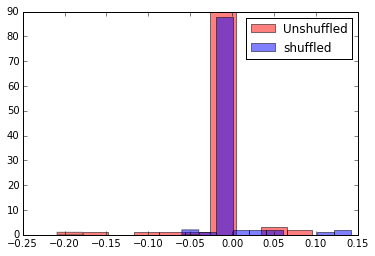

In [63]:
plt.hist(u1, color="red", label="Unshuffled", alpha=0.5)
plt.hist(s1, color="blue", label="shuffled", alpha=0.5)
plt.legend()
plt.show()

The above is correct: since there are more shuffled ones it is extremely hard to achieve an fdr of 0.05
Note that the shuffled 0.10 and 0.15 cancel the reds to the right of -0.10

In [70]:
print np.where(nn)
print nn[np.where(nn)]

(array([66, 66]), array([2, 4]))
[-0.58658832 -0.45253454]


In [65]:
nn2 = nn[:, 2]
sn = s[np.where(s < 0)]
un = u[np.where(u < 0)]

In [66]:
print nn2[np.where(nn2)]

[-0.58658832]


In [68]:
print sorted(un)[:5]

[-0.58658832095299995, -0.45253454330499998, -0.38997069875000001, -0.37082616530699997, -0.35018243378200004]


In [69]:
print sorted(sn)[:5]

[-0.39045168035099997, -0.31750761612, -0.308341478552, -0.27646305448800002, -0.24452370054600001]


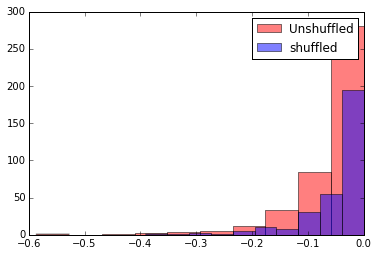

In [67]:
plt.hist(un, color="red", label="Unshuffled", alpha=0.5)
plt.hist(sn, color="blue", label="shuffled", alpha=0.5)
plt.legend()
plt.show()

The above is also correct: only the bottommost negatives across the whole unshuffled matrix have survived, and as soon as there are some shuffled, no more survive fdr, as per above plot

# Confirm pairwise granger causality with rows